In [15]:
import pandas as pd
import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline  

In [100]:


scores_dfs = ["/home/arnaud/code/pollution/mdn_train_test_2/evaluation_results_df.csv"]

features_dfs = ["/home/arnaud/code/pollution/mdn_train_test_2/feature_importance.csv"]

train_scores_dfs = ["/home/arnaud/code/pollution/mdn_train_test_2/evaluation_results_train_df.csv"]

score_df = pd.read_csv(scores_dfs[0], sep=";")
feature_df = pd.read_csv(features_dfs[0], sep=";")
train_score_df = pd.read_csv(train_scores_dfs[0], sep=";")

for df_file in scores_dfs[1:] :
    df = pd.read_csv(df_file, sep=";", header=False)
    score_df = pd.concat([score_df , df], axis=1)
    
for df_file in features_dfs[1:] :
    df = pd.read_csv(df_file, sep=";", header=False)
    feature_df = pd.concat([feature_df , df], axis=1)
    
for df_file in train_scores_dfs[1:] :
    df = pd.read_csv(df_file, sep=";", header=False)
    train_score_df = pd.concat([train_score_df , df], axis=1)




In [101]:
rules_df.head()

,model_id,observation,DSS,LOG,CRPS
0,mdn_test,49.717250,12.930289,4.608738,14.444313
1,mdn_test,14.648896,26.707395,12.254664,2.008737
2,mdn_test,29.996437,9.138409,3.483744,4.715082
3,mdn_test,17.817479,10.234938,3.772865,6.481146
4,mdn_test,12.532667,7.470843,2.996636,2.420307


In [102]:
rules_df_train.head()

,model_id,observation,DSS,LOG,CRPS
0,mdn_train,127.486404,19.601474,6.117607,67.641806
1,mdn_train,24.554938,-15.580819,-2.834730,0.004733
2,mdn_train,3.866468,5.838731,2.791345,2.430425
3,mdn_train,21.220979,6.832304,2.776148,1.342029
4,mdn_train,7.521146,5.022536,2.431310,1.568756


In [103]:
features_df.head()

,Model,feature,rule,diff_value
0,mdn_test,P1_146,DSS,-26556.968148
1,mdn_test,P1_146,LOG,-6.673373
2,mdn_test,P1_146,CRPS,-0.224790
3,mdn_test,P1_309,DSS,849072.940219
4,mdn_test,P1_309,LOG,2.317801


In [99]:
rules_df.groupby('model_id').mean().index

Index(['empirical', 'mdn_test'], dtype='object', name='model_id')

In [28]:
mean_scores = rules_df.groupby('model_id')['DSS', 'LOG', 'CRPS'].mean()
mean_scores

,DSS,LOG,CRPS
model_id,,,
empirical,11.397325,3.534411,5.270893
mdn_test,82916.407071,17.946528,4.578223


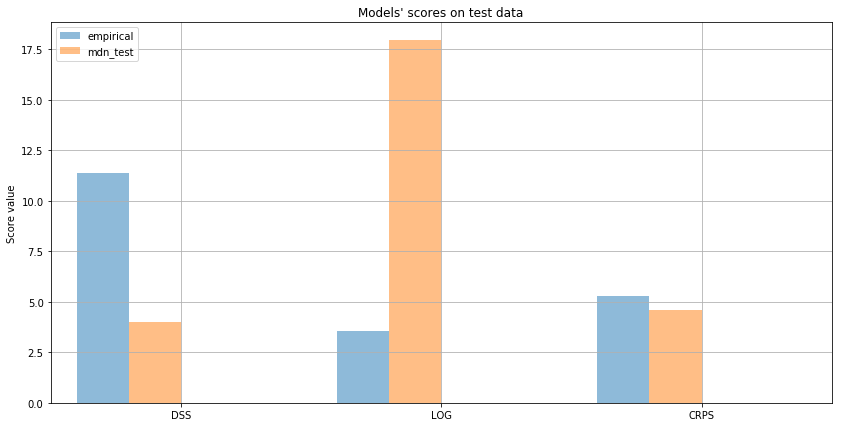

In [87]:
def bar_plot_data(df, title, y_axis):
    pos = list(range(df.values.shape[1])) 

    width = 0.2
    fig, ax = plt.subplots(figsize=(14,7))

    for i in range(df.values.shape[0]):
        plt.bar([p + width*i for p in pos], mean_scores.iloc[i,:].values, width, alpha=0.5, label=mean_scores.index[i]) 

    ax.set_xticks([p + 1.5 * width for p in pos])
    ax.set_xticklabels(df.columns)

    plt.xlim(min(pos)-width, max(pos)+width*4)

    ax.set_ylabel(y_axis)
    ax.set_title(title)

    plt.legend(mean_scores.index, loc='upper left')
    plt.grid()
    plt.show()

In [ ]:
bar_plot_data(mean_scores, "Models\' scores on test data", "Score value")

In [89]:
mean_scores_train = rules_df_train.groupby('model_id')['DSS', 'LOG', 'CRPS'].mean()
mean_scores_train

,DSS,LOG,CRPS
model_id,,,
mdn_train,3.324493,2.016356,3.716917


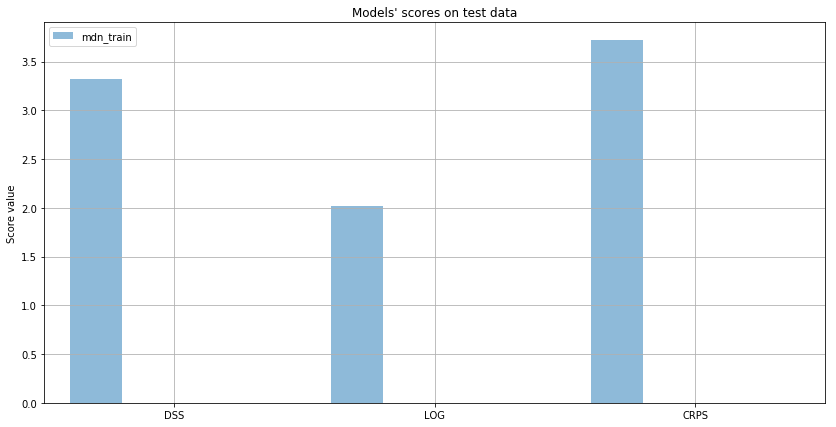

In [90]:
bar_plot_data(mean_scores, "Models\' scores on test data", "Score value")